# Project Assignment 1

In [1]:
import pandas as pd

In [2]:
# Load dataset
df = pd.read_csv("ds_salaries_modified.csv")

In [3]:
# Selecting the important columns specified by the user
important_columns = ["experience_level", "job_title", "salary_in_usd", "remote_ratio", "company_location", "company_size"]
df_selected = df[important_columns]

In [4]:
# Checking basic information about the selected columns
df_info = df_selected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3773 entries, 0 to 3772
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   experience_level  3773 non-null   object
 1   job_title         3763 non-null   object
 2   salary_in_usd     3773 non-null   int64 
 3   remote_ratio      3773 non-null   int64 
 4   company_location  3773 non-null   object
 5   company_size      3767 non-null   object
dtypes: int64(2), object(4)
memory usage: 177.0+ KB


In [5]:
# Summary statistics for quantitative columns
quantitative_columns = ["salary_in_usd", "remote_ratio"]

for col in quantitative_columns:
    print(f"Statistics for {col}:")
    print(f"Mean : {df[col].mean()}")
    print(f"Median : {df[col].median()}")
    print(f"Mode : {df[col].mode()[0]}")  
    print(f"Standard Deviation : {df[col].std()}")
    print(f"Range : {df[col].min()} - {df[col].max()}")
    print("\n")


Statistics for salary_in_usd:
Mean : 137509.51126424596
Median : 135000.0
Mode : 100000
Standard Deviation : 63042.2252169619
Range : 5132 - 450000


Statistics for remote_ratio:
Mean : 46.30267691492181
Median : 0.0
Mode : 0
Standard Deviation : 48.57710890737816
Range : 0 - 100




In [6]:
# Checking missing data
missing_data = df_selected.isnull().sum()
missing_data

experience_level     0
job_title           10
salary_in_usd        0
remote_ratio         0
company_location     0
company_size         6
dtype: int64

In [7]:
# Unique value counts for categorical columns
categorical_columns = ["experience_level", "job_title", "company_location", "company_size"]
unique_counts = df_selected[categorical_columns].nunique()
unique_counts

experience_level     4
job_title           93
company_location    72
company_size         3
dtype: int64

In [8]:
# top 5 values in "job_title"
top_5_job_titles = df_selected["job_title"].value_counts().head(5)
top_5_job_titles

job_title
Data Engineer                1041
Data Scientist                841
Data Analyst                  614
Machine Learning Engineer     289
Analytics Engineer            103
Name: count, dtype: int64

In [9]:
# top 5 values in "company_location"
top_5_company_locations = df_selected["company_location"].value_counts().head(5)
top_5_company_locations

company_location
US    3051
GB     173
CA      88
ES      77
IN      60
Name: count, dtype: int64

# Project Assignment 2

### 1. data quality analysis

In [10]:
# Quantify Missing Values
missing_values = df_selected.isnull().sum()
missing_values

experience_level     0
job_title           10
salary_in_usd        0
remote_ratio         0
company_location     0
company_size         6
dtype: int64

In [11]:
# Unique Value Counts (to identify low-information columns)
unique_counts = df_selected.nunique()
unique_counts 
# All fields have business value and cannot be deleted even if some fields contains few unique values.

experience_level       4
job_title             93
salary_in_usd       1035
remote_ratio           3
company_location      72
company_size           3
dtype: int64

### 2: Check for Duplicate Rows

In [12]:
#(keep='first')=>選出"除了第一個之外"的所有重複行
duplicate_rows = df_selected[df_selected.duplicated(keep='first')]
print(f"Total duplicate rows: {duplicate_rows.shape[0]}")
duplicate_rows

Total duplicate rows: 1406


,experience_level,job_title,salary_in_usd,remote_ratio,company_location,company_size
115,SE,Data Scientist,150000,0,US,M
123,SE,Analytics Engineer,289800,0,US,M
153,MI,Data Engineer,100000,100,US,M
154,MI,Data Engineer,70000,100,US,M
160,SE,Data Engineer,115000,0,US,M
...,...,...,...,...,...,...
3768,MI,Data Scientist,30523,100,IN,L
3769,SE,Data Analyst,128500,0,US,M
3770,SE,Data Architect,92000,100,GB,M
3771,EN,Data Engineer,160000,0,US,M


### 3. Data Cleaning Approach

In [13]:
# Drop duplicate rows
df_cleaned = df_selected.drop_duplicates()
print(f"Total rows BEFORE dropping duplicate rows: {df_selected.shape[0]}")
print(f"Total duplicate rows: {duplicate_rows.shape[0]}")
print(f"Total rows AFTER dropping duplicate rows: {df_cleaned.shape[0]}")
df_cleaned  # DataFrame without duplicate records

Total rows BEFORE dropping duplicate rows: 3773
Total duplicate rows: 1406
Total rows AFTER dropping duplicate rows: 2367


,experience_level,job_title,salary_in_usd,remote_ratio,company_location,company_size
0,SE,Principal Data Scientist,85847,100,ES,L
1,MI,ML Engineer,30000,100,US,S
2,MI,ML Engineer,25500,100,US,S
3,SE,Data Scientist,175000,100,CA,M
4,SE,Data Scientist,120000,100,CA,M
...,...,...,...,...,...,...
3750,SE,Data Scientist,412000,100,US,L
3751,MI,Principal Data Scientist,151000,100,US,L
3752,EN,Data Scientist,105000,100,US,S
3753,EN,Business Data Analyst,100000,100,US,L


In [14]:
# Handle missing values
# - Drop rows where job_title is missing (essential info)
df_cleaned = df_cleaned.dropna(subset=['job_title'])
print(f"Total rows AFTER dropping row of missing job_title: {df_cleaned.shape[0]}")
df_cleaned  # DataFrame without missing job_title

Total rows AFTER dropping row of missing job_title: 2357


,experience_level,job_title,salary_in_usd,remote_ratio,company_location,company_size
0,SE,Principal Data Scientist,85847,100,ES,L
1,MI,ML Engineer,30000,100,US,S
2,MI,ML Engineer,25500,100,US,S
3,SE,Data Scientist,175000,100,CA,M
4,SE,Data Scientist,120000,100,CA,M
...,...,...,...,...,...,...
3750,SE,Data Scientist,412000,100,US,L
3751,MI,Principal Data Scientist,151000,100,US,L
3752,EN,Data Scientist,105000,100,US,S
3753,EN,Business Data Analyst,100000,100,US,L


In [15]:
# Handle missing values
# - Fill missing values in company_size with the mode
df_cleaned.loc[:, 'company_size'] = df_cleaned['company_size'].fillna(df_cleaned['company_size'].mode()[0])
df_cleaned['company_size'] # DataFrame without missing company_size

0       L
1       S
2       S
3       M
4       M
       ..
3750    L
3751    L
3752    S
3753    L
3754    L
Name: company_size, Length: 2357, dtype: object

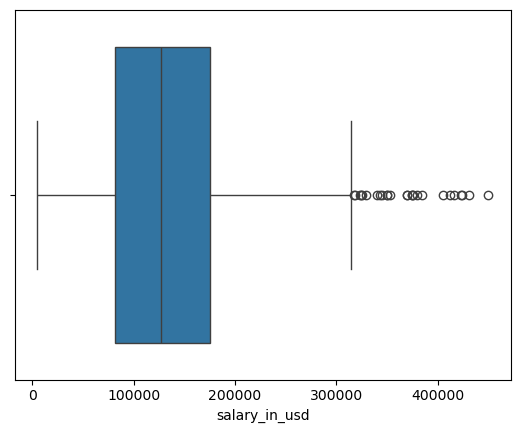

In [16]:
# 根據箱型圖，來查看salary_in_usd的outlier(異常值)狀況
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=df_cleaned["salary_in_usd"])  # 以薪資為例
plt.show()

In [17]:
# Check Outlier Values of "salary_in_usd"  (使用四分位距 (IQR) 來判斷異常值)
numerical_columns = ["salary_in_usd"]
Q1 = df_cleaned[numerical_columns].quantile(0.25)
Q3 = df_cleaned[numerical_columns].quantile(0.75)
IQR = Q3 - Q1
# 計算"salary_in_usd"的上下outlier界線
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print("lower_bound = ", lower_bound.values[0])
print("upper_bound = ", upper_bound.values[0])

lower_bound =  -58750.0
upper_bound =  315250.0


In [18]:
# Fix outlier
# 方法: 將異常值用平均值替換

# Calculate the average salary_in_usd    
mean_value = int(df_cleaned["salary_in_usd"].mean())

# Replace outliers (those greater than 315250) with the mean value
df_cleaned.loc[df_cleaned["salary_in_usd"] > 315250, "salary_in_usd"] = mean_value
df_cleaned

,experience_level,job_title,salary_in_usd,remote_ratio,company_location,company_size
0,SE,Principal Data Scientist,85847,100,ES,L
1,MI,ML Engineer,30000,100,US,S
2,MI,ML Engineer,25500,100,US,S
3,SE,Data Scientist,175000,100,CA,M
4,SE,Data Scientist,120000,100,CA,M
...,...,...,...,...,...,...
3750,SE,Data Scientist,131975,100,US,L
3751,MI,Principal Data Scientist,151000,100,US,L
3752,EN,Data Scientist,105000,100,US,S
3753,EN,Business Data Analyst,100000,100,US,L


In [19]:
# Convert Data Types for Consistency
# The salary data type is changed to "integer"
df_cleaned.loc[:, "salary_in_usd"] = df_cleaned["salary_in_usd"].astype(int)

# remote_ratio is displayed as a percentage, but the value is still int, so it can be directly calculated in the future
df_cleaned.head(10).style.format({"remote_ratio": "{}%"})

,experience_level,job_title,salary_in_usd,remote_ratio,company_location,company_size
0,SE,Principal Data Scientist,85847,100%,ES,L
1,MI,ML Engineer,30000,100%,US,S
2,MI,ML Engineer,25500,100%,US,S
3,SE,Data Scientist,175000,100%,CA,M
4,SE,Data Scientist,120000,100%,CA,M
5,SE,Applied Scientist,222200,0%,US,L
6,SE,Applied Scientist,136000,0%,US,L
7,SE,Data Scientist,219000,0%,CA,M
8,SE,Data Scientist,141000,0%,CA,M
9,SE,Data Scientist,147100,0%,US,M


###  Summary of Cleaned Data

In [20]:
# Data Shape
final_shape = df_cleaned.shape
final_shape    #(rows,columns)

(2357, 6)

In [21]:
# Data Type
final_dtypes = df_cleaned.dtypes
final_dtypes

experience_level    object
job_title           object
salary_in_usd        int64
remote_ratio         int64
company_location    object
company_size        object
dtype: object